In [37]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from matplotlib.colors import ColorConverter
from IPython.core.display import display
from copy import deepcopy

In [69]:
# draw molecules with atom index
def mol_with_atom_index( m ):
    mol = deepcopy(m)
    atoms = mol.GetNumAtoms()
    for idx in range( atoms ):
        mol.GetAtomWithIdx( idx ).SetProp( 'molAtomMapNumber', str( mol.GetAtomWithIdx( idx ).GetIdx() ) )
    return mol

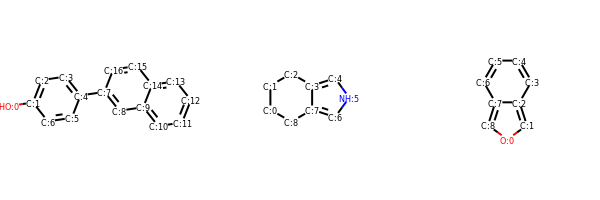

In [70]:
smiles = [
    'OC1=CC=C(C=C1)C2=CC3=CC=CC=C3C=C2',
    'C1CCC2=CNC=C2C1',
    'O1C=C2C=CC=CC2=C1',
]
mols = [Chem.MolFromSmiles(string) for string in smiles]
Draw.MolsToGridImage([mol_with_atom_index(mol) for mol in mols])

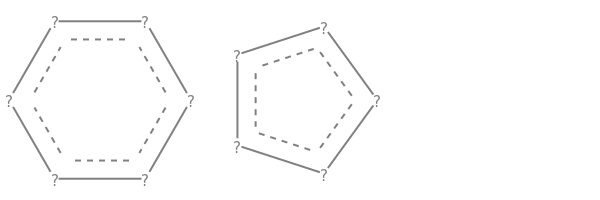

In [72]:
# typical aromatic substructures
patterns = [
    "[a]1:[a]:[a]:[a]:[a]:[a]:1",
    "[a]1:[a]:[a]:[a]:[a]:1"
]
Draw.MolsToGridImage([Chem.MolFromSmarts(pat) for pat in patterns])

Mol 1 - pattern 1: atoms idx ((1, 2, 3, 4, 5, 6), (7, 8, 9, 14, 15, 16), (9, 10, 11, 12, 13, 14))


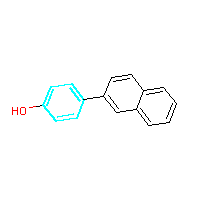

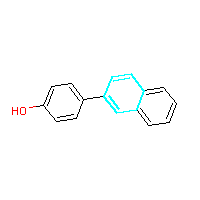

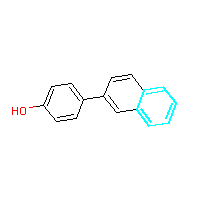

Mol 2 - pattern 2: atoms idx ((3, 4, 5, 6, 7),)


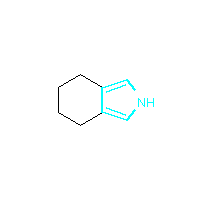

Mol 3 - pattern 1: atoms idx ((2, 3, 4, 5, 6, 7),)


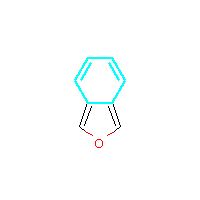

Mol 3 - pattern 2: atoms idx ((0, 1, 2, 7, 8),)


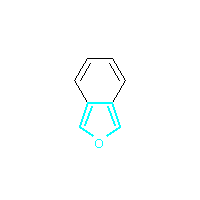

In [81]:
for i,mol in enumerate(mols):
    for j,pattern in enumerate(patterns):
        pat = Chem.MolFromSmarts(pattern)
        matches = mol.GetSubstructMatches(pat)
        if matches:
            print('Mol {} - pattern {}: atoms idx'.format(i+1, j+1), matches)
            for match in matches:
                img = Draw.MolToImage(mol, highlightAtoms=match, size=(200,200), fitImage=True,
                                highlightColor=ColorConverter().to_rgb('cyan'))
                display(img)